Created by Errahum https://github.com/Errahum

Linkedin: https://www.linkedin.com/in/erahum/

Mail: mail@erahum.com

Youtube: https://www.youtube.com/@Errahum

### Objective:
Surpass the random walk

# Data Processing

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pathlib import Path
import importlib.util

# parents[2] refers to the grandparent directory (two levels up)
def dynamic_import(module_name, parent_levels_up=2):
    # Get the absolute path to the parent directory
    current_dir = Path.cwd()
    parent_dir = current_dir.parents[parent_levels_up]
    
    # Define the path to the module
    file_path = parent_dir / 'src' / 'data_management' / f'{module_name}.py'
    data_path = parent_dir / 'data'
    
    # Dynamically import the module
    spec = importlib.util.spec_from_file_location(module_name, str(file_path))
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    
    return module, data_path

# Import the notebook_data_tools module
notebook_data_tools, data_path = dynamic_import('notebook_data_tools')

# Use the imported functions
impute_df = notebook_data_tools.impute_df
delete_duplicates = notebook_data_tools.delete_duplicates
log_return_df = notebook_data_tools.log_return_df
drop_negative_values = notebook_data_tools.drop_negative_values

In [34]:
CL = pd.read_csv(data_path / 'extract_transform' / 'CL=F_1d.csv')
CL = CL.drop(['Unnamed: 0'], axis=1)
CL = impute_df(CL)
CL = delete_duplicates(CL)
CL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,263542
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,258887
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,370059
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,246632
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,310377


In [35]:
CL['Date'].duplicated().sum()

0

In [36]:
CL['Date'] = pd.to_datetime(CL['Date'], format='mixed')
CL.set_index('Date')
CL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,263542
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,258887
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,370059
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,246632
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,310377


In [37]:
CL.index.duplicated().sum()

0

In [38]:
CL.index.duplicated()

array([False, False, False, ..., False, False, False])

In [39]:
CL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3694 non-null   datetime64[ns]
 1   Open       3694 non-null   float64       
 2   High       3694 non-null   float64       
 3   Low        3694 non-null   float64       
 4   Close      3694 non-null   float64       
 5   Adj Close  3694 non-null   float64       
 6   Volume     3694 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 202.1 KB


In [40]:
def negative(df):
    negative_values = df[df['Close'] < 0]['Close']
    if not negative_values.empty:
        print("There are negatives:")
        print(negative_values)
    else:
        print("no negatives.")


In [41]:
CL = delete_duplicates(CL)
CL = drop_negative_values(CL)
negative(CL)
CL['log_return'] = log_return_df(CL['Close'])
CL = pd.DataFrame(CL['log_return'])

no negatives.


In [42]:
CL.isna().sum().sum()

1

In [43]:
CL.head()

,log_return
0,NaN
1,0.003185
2,0.017097
3,-0.006271
4,0.001088


<Axes: >

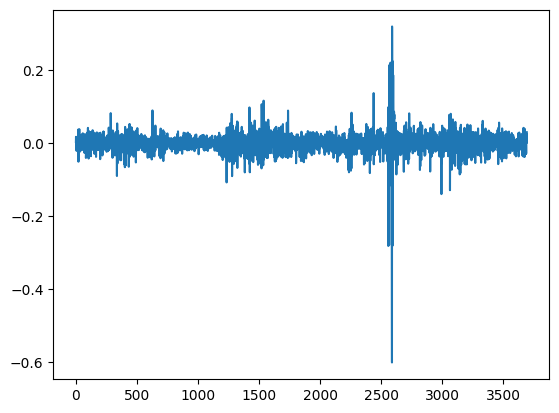

In [44]:
CL['log_return'].plot()

# Model